1. Implement the intensity transformation

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Load the grayscale image

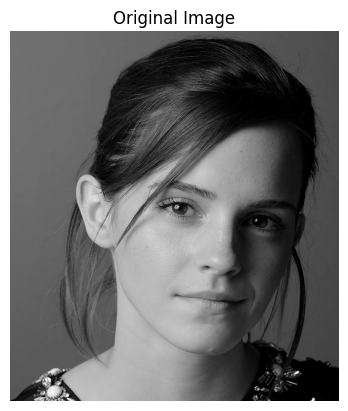

In [6]:
image_path = "a1images/emma.jpg"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide axis
plt.show()

 lookup table for an intensity transformation

In [8]:
t1 = np.linspace(0, 50, 50).astype('uint8')
t2 = np.linspace(100, 255, 100).astype('uint8')
t3 = np.linspace(150, 255, 106).astype('uint8')

lookup_table = np.concatenate([t1, t2, t3])

visually represents the lookup table

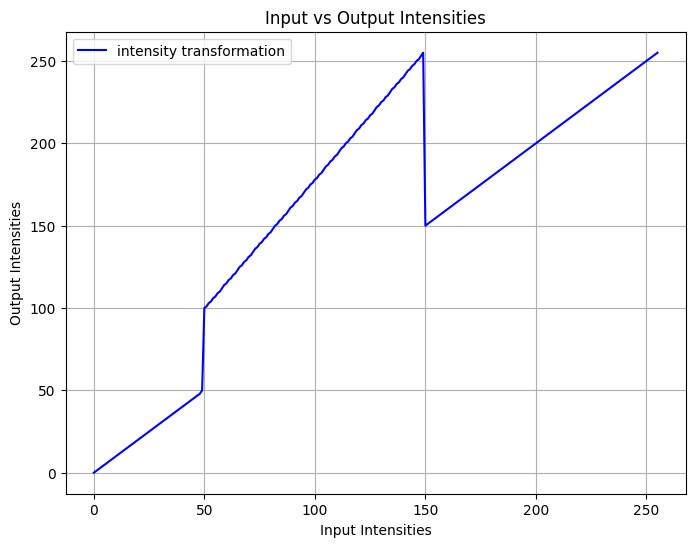

In [9]:
#input intensities
input_intensities = np.arange(256)

#plot input and output intensities
plt.figure(figsize=(8,6))
plt.plot(input_intensities, lookup_table, color='blue', label="intensity transformation")
plt.title('Input vs Output Intensities')
plt.xlabel('Input Intensities')
plt.ylabel('Output Intensities')
plt.grid(True)
plt.legend()
plt.show()

Appy Transformation

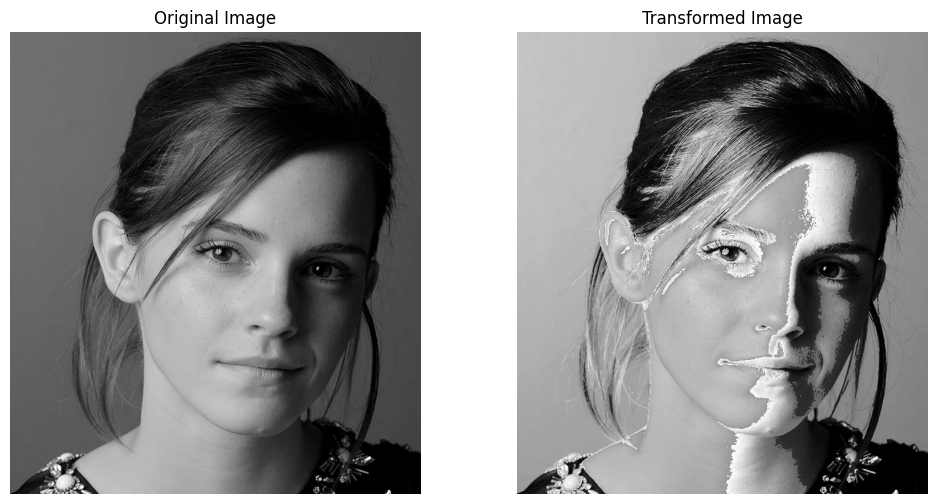

In [10]:
image_transformed = cv.LUT(image, lookup_table)

# Display original and transformed image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()